In [1]:
%cd drive/MyDrive/DataMining/hw2

/content/drive/MyDrive/DataMining/hw2


# <div dir="rtl">سوال اول</div>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import kendalltau

## <div dir="rtl">خواندن دیتاست و درک اولیه از داده‌ها</div>


In [3]:
df = pd.read_csv("credit cards.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   limit_bal  30000 non-null  float64
 1   sex        30000 non-null  float64
 2   education  30000 non-null  float64
 3   marriage   30000 non-null  float64
 4   age        30000 non-null  float64
 5   pay_1      30000 non-null  float64
 6   pay_2      30000 non-null  float64
 7   pay_3      30000 non-null  float64
 8   pay_4      30000 non-null  float64
 9   pay_5      30000 non-null  float64
 10  pay_6      30000 non-null  float64
 11  bill_amt1  30000 non-null  float64
 12  bill_amt2  30000 non-null  float64
 13  bill_amt3  30000 non-null  float64
 14  bill_amt4  30000 non-null  float64
 15  bill_amt5  30000 non-null  float64
 16  bill_amt6  30000 non-null  float64
 17  pay_amt1   30000 non-null  float64
 18  pay_amt2   30000 non-null  float64
 19  pay_amt3   30000 non-null  float64
 20  pay_am

In [5]:
df.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


## <div dir="rtl">کشیدن heatmap بر اساس همبستگی بین ویژگی‌ها</div>

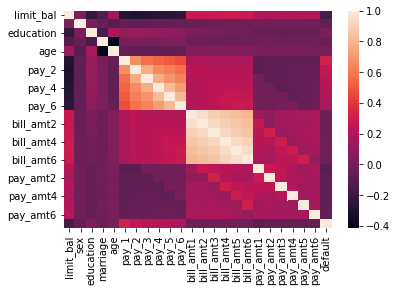

In [6]:
sns.heatmap(df.corr())
plt.show()

## <div dir="rtl"> تحلیل قسمت اول</div>

<div dir="rtl">

در این قسمت heatmap ویژگیهای دیتاست را رسم کردیم. 

همانطور که در نمودار نیز مشخص است همبستگی ویژگیها بین منفی 0.4 تا 1 می‌باشد. محلهایی که با رنگهای بسیار روشن یا بسیار تیره مشخص شده اند به معنی ویژگیهای با همبستگی زیاد می‌باشد.

همانطور که قابل مشاهده است هر ویژگی با خودش بیشترین همبستگی را دارد.

<div>

In [7]:
df.corr()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
limit_bal,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
sex,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
education,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
marriage,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
age,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
pay_1,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
pay_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
pay_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
pay_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
pay_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


## <div dir="rtl">  قسمت دوم</div>

<div dir="rtl">

در این قسمت به کمکheatmap قسمت اول و همچنین بررسی مقادیر عددی همبستگی 6 ویژگی که بیشترین همبستگی را دارند انتخاب کردم و دیتافریمی ساختم که تنها شامل همین سه ویژگی می‌شود.

در گام بعدی به کمک pairplot همبستگی هر دو ویژگی را در قسمت زیر نمایش داده ام.

با بررسی نمودارها این طور به نظر میرسد که ویژگیها دو به دو رابطه شبه خطی با یکدیگر دارند و میتوان همبستگی بین ویژگیها را در شکلها مشاهده کرد.

<div>

In [8]:
df6 = df[["bill_amt1", "bill_amt2", "bill_amt3", "bill_amt4", "bill_amt5", "bill_amt6"]]

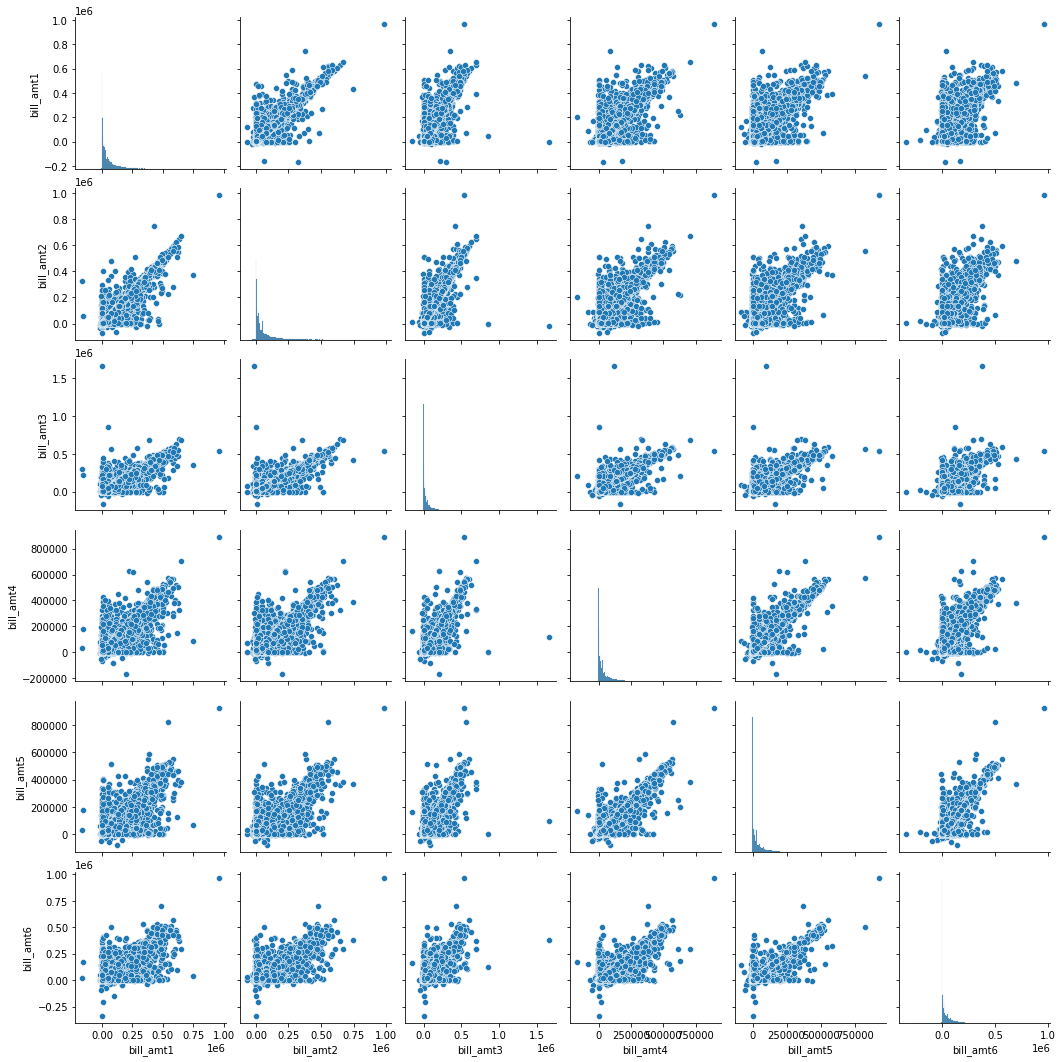

In [9]:
sns.pairplot(df6)
plt.show()

## <div dir="rtl"> قسمت سوم</div>

<div dir="rtl">

در این قسمت با استفاده از روش spearman همبستگی بین ویژگیها را استخراج میکنیم و همبستگی هر یک از ویژگیها را با ویژگی هدف بدست آوردم و در سلول زیر نمایش میدهم.

مقادیر همبستگی بین منفی 0.169 تا 0.292 قرار دارند. 

بیشترین همبستگی هم جهت بین ویژگی هدف و pay_1 است و بیشترین همبستگی غیرهمجهت بین ویژگی هدف و limit_bal است.

همچنین کمترین همبستگی بین ویژگی هدف و ویژگی bill_amt6 است. 


<div>

In [11]:
for column in df.columns.tolist():
  if column == 'default':
    continue
  rho, p = spearmanr(df[column], df['default'])
  print("Rank correlation, spearman between ", "\t", column, "\t\t and default: ", rho)

Rank correlation, spearman between  	 limit_bal 		 and default:  -0.16958627777128973
Rank correlation, spearman between  	 sex 		 and default:  -0.0399605777054416
Rank correlation, spearman between  	 education 		 and default:  0.044368962873443094
Rank correlation, spearman between  	 marriage 		 and default:  -0.026489789964479267
Rank correlation, spearman between  	 age 		 and default:  0.005148863519844661
Rank correlation, spearman between  	 pay_1 		 and default:  0.2922132153119903
Rank correlation, spearman between  	 pay_2 		 and default:  0.21691875073932657
Rank correlation, spearman between  	 pay_3 		 and default:  0.19477122842037808
Rank correlation, spearman between  	 pay_4 		 and default:  0.17368952787447228
Rank correlation, spearman between  	 pay_5 		 and default:  0.15904328252424124
Rank correlation, spearman between  	 pay_6 		 and default:  0.1425232152732447
Rank correlation, spearman between  	 bill_amt1 		 and default:  -0.025326827533909278
Rank correla

## <div dir="rtl"> قسمت چهارم</div>

<div dir="rtl">

در این قسمت با استفاده از روش kendall همبستگی بین ویژگیها را استخراج میکنیم و همبستگی هر یک از ویژگیها را با ویژگی هدف بدست آوردم و در سلول زیر نمایش میدهم.

مقادیر همبستگی بین منفی 0.141 تا 0.267 قرار دارند. 

بیشترین همبستگی هم جهت بین ویژگی هدف و pay_1 است و بیشترین همبستگی غیرهمجهت بین ویژگی هدف و limit_bal است.

همچنین کمترین همبستگی بین ویژگی هدف و ویژگی bill_amt6 است. 

مقادیر همبستگی دو قسمت از حیث مقدار یا یکدیگر متفاوتند اما از حیث ترتیب ویژگیها رفتار مشابهی در دو روش محاسبه همبستگی دارند.

<div>

In [12]:
for column in df.columns.tolist():
  if column == 'default':
    continue
  rho, p = kendalltau(df[column], df['default'])
  print("Rank correlation, kendall between ", "\t", column, "\t\t and default: ", rho)

Rank correlation, kendall between  	 limit_bal 		 and default:  -0.14108769832148232
Rank correlation, kendall between  	 sex 		 and default:  -0.03996057770544159
Rank correlation, kendall between  	 education 		 and default:  0.042070347877700164
Rank correlation, kendall between  	 marriage 		 and default:  -0.026329990087529707
Rank correlation, kendall between  	 age 		 and default:  0.004273227938142226
Rank correlation, kendall between  	 pay_1 		 and default:  0.267885139321824
Rank correlation, kendall between  	 pay_2 		 and default:  0.20155569785913025
Rank correlation, kendall between  	 pay_3 		 and default:  0.18107659165154996
Rank correlation, kendall between  	 pay_4 		 and default:  0.16204704142697676
Rank correlation, kendall between  	 pay_5 		 and default:  0.1488286131811423
Rank correlation, kendall between  	 pay_6 		 and default:  0.13302834274776063
Rank correlation, kendall between  	 bill_amt1 		 and default:  -0.020724146355352767
Rank correlation, kendal

## <div dir="rtl"> قسمت پنجم</div>

<div dir="rtl">

در این قسمت با استفاده از روش spearman همبستگی ها را محاسبه کرده و براین اساس heatmap را رسم میکنیم.

گرچه heatmap فعلی با heatmap قسمت اول متفاوت است و ترکیب رنگ متفاوتی دارد اما از نظر ترتیب هر دو heatmap رفتار مشابهی دارند.

<div>

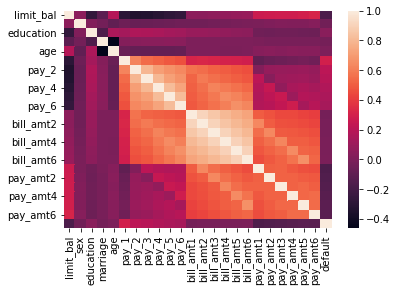

In [13]:
sns.heatmap(df.corr(method = 'spearman'))